# Covid and its financial impacts

In this notebook, you will compile the visualizations from the analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import pycountry
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


Bad key savefig.frameon in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\chapm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

#### Jay's dataframes 

In [2]:
file_path = Path("Data\owid-covid-data-20210928.csv")
covid_data = pd.read_csv(file_path)
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
covid_data['Date'] = pd.to_datetime(covid_data['date']).dt.date 
#covid_data
analysis = covid_data[['date','continent','location','total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred']]#.set_index('Date')
# removing any noise from the data set
analysis = analysis[(analysis['location'] != analysis['continent']) & (~analysis['continent'].isnull())]
analysis = analysis.fillna(0)
#analysis.info()
continent = analysis.groupby(['location'])['total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred'].mean().reset_index().sort_values(by='total_cases')
continent.head()

location  total_cases  population_density  gdp_per_capita  \
134              Montserrat          0.0               0.000             0.0   
201                 Tokelau          0.0               0.000             0.0   
149         Northern Cyprus          0.0               0.000             0.0   
28   British Virgin Islands          0.0             207.973             0.0   
82                 Guernsey          0.0               0.000             0.0   

     reproduction_rate  total_vaccinations_per_hundred  
134                0.0                        4.142342  
201                0.0                        2.463509  
149                0.0                        2.673131  
28                 0.0                       11.335943  
82                 0.0                       37.056885

#### Luke's dataframes

In [3]:
# Set the file paths
audusd_data = Path("Data/audusd.csv")
cadusd_data = Path("Data/cadusd.csv")
chfusd_data = Path("Data/chfusd.csv")
eurusd_data = Path("Data/eurusd.csv")
gbpusd_data = Path("Data/gbpusd.csv")
usdcny_data = Path("Data/usdcny.csv")
usdjpy_data = Path("Data/usdjpy.csv")
sp500_data = Path("Data/sp500.csv")
vix_data = Path("Data/vix_history.csv")
xlb_data = Path("Data/xlb.csv")
xle_data = Path("Data/xle.csv")
xlf_data = Path("Data/xlf.csv")
xli_data = Path("Data/xli.csv")
xlp_data = Path("Data/xlp.csv")
xlu_data = Path("Data/xlu.csv")
xlv_data = Path("Data/xlv.csv")
xly_data = Path("Data/xly.csv")
covid_data = Path("Data/covid19_global_table_data.csv")

# Read the CSVs and set the `Date` column as a datetime index to the DataFrame
# Currency
audusd_df = pd.read_csv(audusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cadusd_df = pd.read_csv(cadusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
chfusd_df = pd.read_csv(chfusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_df = pd.read_csv(eurusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_df = pd.read_csv(gbpusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcny_df = pd.read_csv(usdcny_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_df = pd.read_csv(usdjpy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# S&P500 & Volatility Index
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_df = pd.read_csv(vix_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_close_df = vix_df.drop(columns=['Open','High','Low'])
# Sectors : Energy. XLE, Materials.XLB, Industrials.XLI, Utilities. XLU, Healthcare.XLV, 
#           Financials.XLF, Consumer Discretionary.XLY, Consumer Staples.XLP
xlb_df = pd.read_csv(xlb_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xle_df = pd.read_csv(xle_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlf_df = pd.read_csv(xlf_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xli_df = pd.read_csv(xli_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlp_df = pd.read_csv(xlp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlu_df = pd.read_csv(xlu_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlv_df = pd.read_csv(xlv_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xly_df = pd.read_csv(xly_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Covid 19 global data
covid_df = pd.read_csv(covid_data, index_col= 0, infer_datetime_format=True, parse_dates=True)
# Create a new pivot table where the columns are the closing prices for each pair
fx_combined_df = pd.concat([audusd_df, eurusd_df, gbpusd_df], axis="columns", join="inner")#, cadusd_df, chfusd_df, sp500_df, usdcny_df, usdjpy_df
# Create a new pivot table where the columns are the closing prices for each sector
sector_combined_df = pd.concat([xlb_df, xle_df, xlf_df, xli_df, xlp_df, xlu_df, xlv_df, xly_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
fx_combined_df.sort_index(inplace=False)
sector_combined_df.sort_index(inplace=False)

# Set column names
fx_combined_df.columns = ['AUDUSD', 'EURUSD', 'GBPUSD']# 'CADUSD', 'CHFUSD', 'USDCNY', 'USDJPY']#, 'SP500']
sector_combined_df.columns = ['Materials', 'Energy', 'Financials', 'Industrials', 'Cons Staples', 'Utilities', 'Healthcare', 'Cons Disc']
fx_daily_change = fx_combined_df.pct_change()
sector_daily_change = sector_combined_df.pct_change()
sector_daily_change_std = sector_daily_change.std
sector_daily_change_sum = sector_daily_change.cumsum()
sector_daily_change_sum.head()
sector_correlation = sector_daily_change.corr()



#### Chapman's dataframes

In [4]:
# load the csv files into dataframes and do some simple cleaning
health_expenditure_df = pd.read_csv("Data\health_expenditure_per_capita.csv")
health_expenditure_df.dropna(inplace=True)

covid_df = pd.read_csv("Data\JHcovid12-31-2020.csv")
covid_df = covid_df[["Country_Region", "Confirmed", "Deaths", "Case_Fatality_Ratio"]]
grouped = covid_df.groupby("Country_Region").sum()

life_expectancy_df = pd.read_csv("Data\life_expectancy_data.csv")
life_expectancy_df.columns = ["Country", "Life Expectancy"]
life_expectancy_df.set_index("Country", inplace=True)

#### Max's dataframes

In [5]:
gdp_data = pd.read_csv('Data\GDP_DF.csv')
gdp_data = gdp_data.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
gdp_data = pd.melt(gdp_data,id_vars='Country Name',value_vars=gdp_data.columns[1:-2])
gdp_data.columns = ['Country','Year','GDP']
world_gdp = gdp_data[gdp_data['Country'] == 'World'].reset_index()[['Year','GDP']]

avg_gdp = world_gdp.GDP
growth_rate = []
for i in range(59):
    growth_rate.append(round(((avg_gdp[i+1]-avg_gdp[i])/avg_gdp[i])*100,3))
growth_rate.append(np.nan)
world_gdp['Growth_rate'] = growth_rate


In [6]:
#Jay's functions to produce graphs
def gdp_per_capita():
    
    output = px.parallel_coordinates(continent, color='gdp_per_capita', title ='Multi-Dimensional plot vs GDP per Capita',)
    
    return output
def vaccinations_gdp_per_capita():
    
    fig3 = px.scatter(
    continent,
    y='gdp_per_capita',
    x='total_vaccinations_per_hundred',
    color = 'total_vaccinations_per_hundred',
    trendline="ols",
    title ='GDP per Capita vs Total Vaccinations per Hundred',
        hover_data=['location'],
        marginal_y="histogram"
)

    return fig3

def pop_density_total_cases():
    fig = px.scatter(continent, x="population_density", y="total_cases", trendline="ols", color="total_cases", hover_data=['location'], title ='Population Density vs Total Cases', log_x=True, 
                     #log_y=True
                    )
    return fig

#Luke's functions
def fx_daily_change_plot_1():
    fx_daily_change_plot_1 = px.line(fx_daily_change, title="Currency Daily Changes" )
    return fx_daily_change_plot_1

def sector_daily_change_sum_plot_1():
    sector_daily_change_sum_plot_1 = px.line(sector_daily_change_sum, title="Sector Daily Changes Sum Plot")
    return sector_daily_change_sum_plot_1

def sp500_plot_1():
    sp500_plot_1 = px.line(sp500_df, title="S&P 500 Historical Plot")
    return sp500_plot_1

def fx_daily_plot_1():
    fx_daily_plot_1 = px.line(fx_combined_df, title="Global Currencies v's the US Dollar")
    return fx_daily_plot_1

def vix_change_plot():
    vix_change_plot = px.line(vix_close_df, title="Volatility Index AKA The Fear Index")
    return vix_change_plot

def sector_correlation_heatmap():
    sector_correlation_heatmap = px.imshow(sector_correlation, title='Sector Correlations')
    return sector_correlation_heatmap

#Chapman's functions
def random_countries(n, lower, upper):
    grouped_filtered = grouped[(grouped["Case_Fatality_Ratio"] > lower) & (grouped["Case_Fatality_Ratio"] < upper)]
    global random 
    random = grouped_filtered.sort_values("Confirmed").sample(n=n)
    random.rename_axis("Country", inplace=True)
    global random_list
    random_list = list(random.index)
    
    
# function that returns two plots for "Deaths" and "Cases" Vs life expectancy for the randomly selected countries
def plot_life_expectancy(): 
    random_life_expectancy = life_expectancy_df[life_expectancy_df.index.isin(random_list)]
    covid_life_expectancy = pd.concat([random, random_life_expectancy], axis="columns", join="inner")
    return covid_life_expectancy.hvplot.scatter(x="Life Expectancy", y="Deaths", by="Country", title="Life Expectancy Vs Deaths") + covid_life_expectancy.hvplot.scatter(x="Life Expectancy", y="Confirmed", by="Country", title="Life Expectancy Vs Cases")

# function that returns two plots for "Deaths" and "Cases" Vs health expenditure per person for the randomly selected countries
def plot_health_expenditure():
    random_health_df = health_expenditure_df[health_expenditure_df["Country"].isin(random_list)]
    random_health_df.set_index("Country", inplace=True)
    combined_df = pd.concat([random, random_health_df], axis="columns", join="inner")
    return combined_df.hvplot.scatter(x="International Dollar Per Capita (PPP)", y="Deaths", by="Country", title="Health Expenditure Per Person Vs Deaths") + combined_df.hvplot.scatter(x="International Dollar Per Capita (PPP)", y="Confirmed", by="Country", title="Health Expenditure Per Person Vs Cases")


# Max's functions
def create_fig(graph_obj,title='',x_title='',y_title=''):
    '''
    This function takes in a graph object and return a figure
    '''
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig


def get_trend_plot(loc,country=False):
    df = gdp_data[gdp_data['Country'] == loc].reset_index()[['Year','GDP']]
    gdp_series = df.GDP
    growth_rate = []
    for i in range(59):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    df['Growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = df.Year,
    y = df.GDP,
    mode = "lines+markers",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = df.Year,
    y = df.Growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    text= 'GDP growth rate (%)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'GDP Trend: ' + loc
    fig2_title = 'GDP growth rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','GDP in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','GDP growth rate (%)')
    
    return fig1, fig2

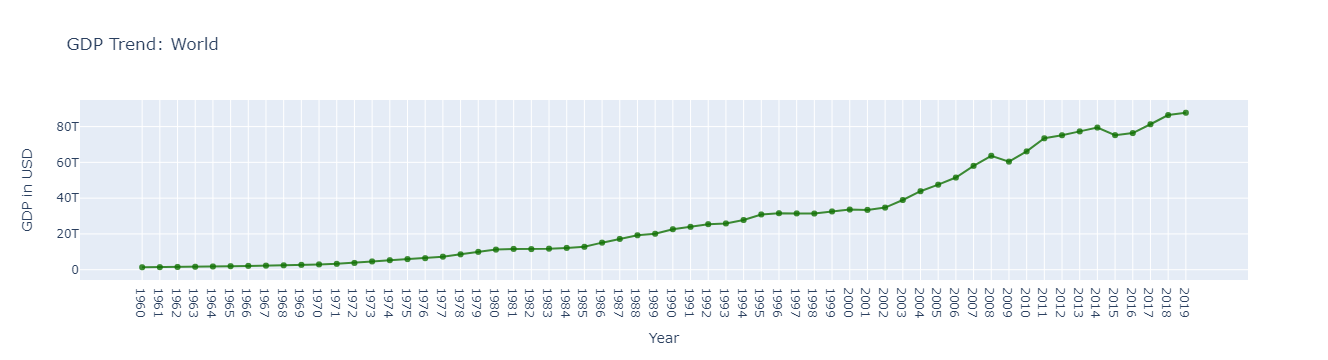

In [9]:
#Jay's Panels
parallel_coordinates = pn.Row(
    '## Tab 1',
    gdp_per_capita()
)

tab2 = pn.Row(  
    '## Tab2',
    vaccinations_gdp_per_capita(),
    pop_density_total_cases()
)
# Luke's panels
# Put covid plots in a single row
row_of_currency = pn.Row(fx_daily_plot_1(), fx_daily_change_plot_1())# fx_pair_plot, , fx_correlation_heatmap, fx_daily_change_plot_1, fx_change_covid)
row_of_sector = pn.Row(sector_daily_change_sum_plot_1(),sector_correlation_heatmap())
row_of_sp500vix = pn.Row(vix_change_plot(), sp500_plot_1())#sp_vix_combined_plot,
plots_as_column = pn.Column("## Covid 19's Effect on the world economy", row_of_sp500vix)


#Chapman's panels
# create widgets
n_slider = pn.widgets.IntSlider(name='Set No. of Countries', start=10, end=100, step=5, value=30)
lower_slider = pn.widgets.FloatSlider(name='Set min fatality rate', start=0, end=5, step=.1, value= 0.8)       
upper_slider = pn.widgets.FloatSlider(name='Set max fatality rate', start=0, end=5, step=.1, value = 1.5)
button = pn.widgets.Button(name='Generate data and graph', button_type='primary')

# A helper function to call random_countries when button is clicked. Must be declared after the widgets have been created since it references them.
def random_countries_f(event):
    random_countries(n_slider.value, lower_slider.value, upper_slider.value)
    chapman_layout[1].object = plot_health_expenditure()
    chapman_layout[2].object = plot_life_expectancy()
    

# initiate starting data
random_countries(30, .8, 2.5)

button.on_click(random_countries_f)
chapman_layout = pn.Column(pn.Column(n_slider, lower_slider, upper_slider, button), plot_health_expenditure(), plot_life_expectancy())

#Max's panels
gdpTrend, rateTrend = get_trend_plot('World')
#iplot(gdpTrend)
#iplot(rateTrend)
maxs_panel = pn.Column(
    '## Tab 1',
    iplot(gdpTrend)
)

In [10]:
tabs = pn.Tabs(
    #("Welcome", welcome_column),
    ("JC: Multi-dimensional coordinates",parallel_coordinates),
    ("JC: Further analysis of Covid data", tab2),
    ("LM: S&P500", plots_as_column),
    ("LM: Currency Plots", row_of_currency),
    ("LM: Sector Plots", row_of_sector),
    ("CM: Chapman's Random generator", chapman_layout),
    ("MM: Max's graphs", maxs_panel)
)


# Create the dashboard
tabs#.servable()

Tabs
    [0] Row
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)
        [2] Plotly(Figure, visible=False)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, visible=False)
            [1] Plotly(Figure, visible=False)
    [3] Row
        [0] Plotly(Figure, visible=False)
        [1] Plotly(Figure, visible=False)
    [4] Row
        [0] Plotly(Figure, visible=False)
        [1] Plotly(Figure, visible=False)
    [5] Column
        [0] Column
            [0] IntSlider(end=100, name='Set No. of Countries', start=10, step=5, value=30)
            [1] FloatSlider(end=5, name='Set min fatality rate', value=0.8)
            [2] FloatSlider(end=5, name='Set max fatality rate', value=1.5)
            [3] Button(button_type='primary', name='Generate data and graph')
        [1] HoloViews(Layout)
        [2] HoloViews(Layout)
    [6] Column
        [0] Markdown(str)
        [1] Str(None)